# ML Capstone 1 - Part 2 E-Commerce Customer Segmentation

 ## TODO

 ### Feature Selection
- Selecting relevant features for segmentation and classification based on EDA insights
- Scaling numerical features and encoding categorical variables

### Model Preparation
- Preparing the dataset for clustering algorithms and classification models


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

1 Data Retrieval

In [16]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df_customer=pd.read_csv('/content/drive/MyDrive/Elevate Pro/ML/new_ecommerce_data.csv')

In [19]:
df_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Month,Year,Time,Hour,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,December,2010,08:26:00,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December,2010,08:26:00,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,December,2010,08:26:00,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December,2010,08:26:00,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December,2010,08:26:00,8,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,December,2011,12:50:00,12,Friday
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,December,2011,12:50:00,12,Friday
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December,2011,12:50:00,12,Friday
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December,2011,12:50:00,12,Friday


####credit for RFM Analysis is below link
####https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis

###1. Feature Selection

1.1 RFM Analysis

RFM analysis is a technique used in marketing,by grouping clients according to their behavior. The abbreviation "RFM" stands for three significant elements:

* Recency (R): Recency informs us of the most recent date of a customer's purchase. It gauges a customer's level of involvement with a brand. Customers who have recently made purchases are thought to be more active and more likely to react favorably to marketing initiatives.

* Frequency (F): Frequency tells how frequently a customer makes purchases over a specific time period. It gauges the degree of client involvement and activity. Customers that make more regular purchases are viewed as loyal and may be the focus of certain marketing activities.

* Monetary Value (M): Monetary Value describes the entire sum of money a client spends over a certain period of time.Customers that make larger purchases are valued more highly and may be given additional incentives to encourage them to make additional purchases.

1.1.1 Recency

In [20]:
df=df_customer.copy() # Take copy of origininal datset
# Convert 'InvoiceDate' column to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date=max(df['InvoiceDate']) # finding last date
df["Recency"]= (max_date - df['InvoiceDate']).dt.days # calculating days between invoice date and last date
grp_recency=(df.groupby('CustomerID')['Recency'].min()).reset_index() # making group of customerid depends upon latest order


3.1.2.2 Frequency

In [21]:
# finding frequency of order of each customer
grp_frequency=(df.groupby('CustomerID')['InvoiceNo'].count()).reset_index()
grp_frequency = grp_frequency.rename(columns={'InvoiceNo': 'Frequency'})
grp_frequency

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,721


3.1.2.3 Monetary

In [22]:
# searching for amount spend by each customer
grp_monetary=(df.groupby('CustomerID')['Amount'].sum()).reset_index()
grp_monetary = grp_monetary.rename(columns={'Amount': 'Total_amount'})
grp_monetary

,CustomerID,Total_amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2045.53


In [23]:
# merging all 3 recency, frequency and spend money
df_RFM = pd.merge(pd.merge(grp_recency,grp_frequency,on='CustomerID'),grp_monetary,on='CustomerID')
df_RFM

,CustomerID,Recency,Frequency,Total_amount
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40
...,...,...,...,...
4334,18280,277,10,180.60
4335,18281,180,7,80.82
4336,18282,7,12,178.05
4337,18283,3,721,2045.53


*   Higher R ranks indicate more recent purchases (better customers).
*   Higher F ranks indicate frequent buyers (loyal customers).
*   Higher M ranks indicate big spenders (high-value customers).

This helps in identifying top customers vs. low-value customers.

In [24]:
# sorting data according to recency, frequency and monetary
df_RFM['R'] = df_RFM['Recency'].rank(ascending=False)
df_RFM['F'] = df_RFM['Frequency'].rank(ascending=False)
df_RFM['M'] = df_RFM['Total_amount'].rank(ascending=False)

df_RFM

,CustomerID,Recency,Frequency,Total_amount,R,F,M
0,12346,325,1,77183.60,161.0,4303.5,10.0
1,12347,1,182,4310.00,4203.5,511.5,335.0
2,12348,74,31,1797.24,1653.0,2502.0,1004.0
3,12349,18,73,1757.55,3182.0,1428.5,1027.0
4,12350,309,17,334.40,230.5,3257.0,3097.0
...,...,...,...,...,...,...,...
4334,18280,277,10,180.60,353.0,3717.5,3768.0
4335,18281,180,7,80.82,859.5,3933.0,4235.0
4336,18282,7,12,178.05,3795.5,3571.0,3788.0
4337,18283,3,721,2045.53,4016.0,31.5,874.0


3.2.1 Checking Distribution of R,F,M

<ipython-input-25-bbb1a22072e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RFM['R'], color='blue',)
<ipython-input-25-bbb1a22072e2>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RFM['F'], color='blue')
<ipython-input-25-bbb1a22072e2>:14: UserWarning: 

`distplot` is a deprecated 

<Axes: xlabel='M', ylabel='Density'>

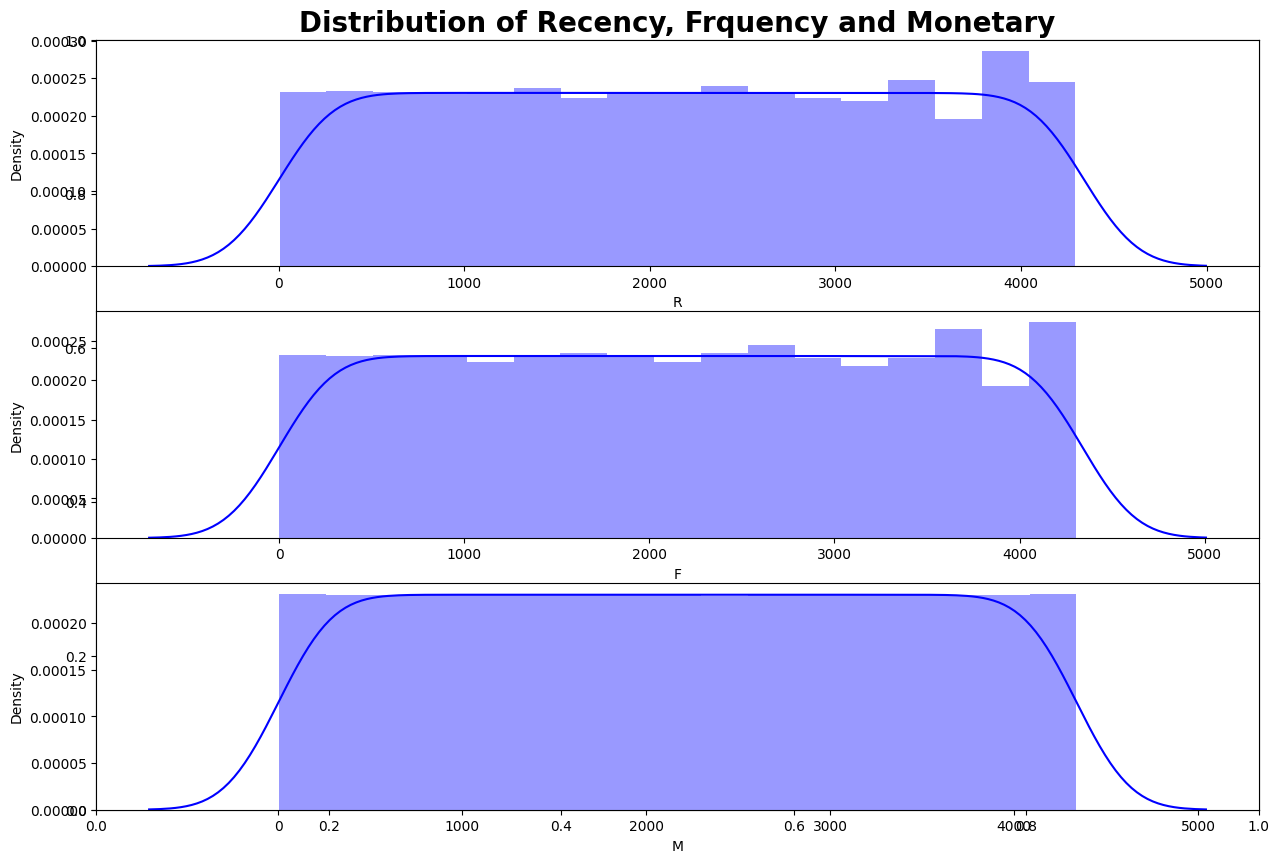

In [25]:
plt.figure(figsize=(15,10))# set the fig. size
# Set the plot title
plt.title('Distribution of Recency, Frquency and Monetary', size=20, fontweight='bold')
# Plot the distribution of recency data
plt.subplot(3, 1, 1)
sns.distplot(df_RFM['R'], color='blue',)

# plot the distribution of frequency data
plt.subplot(3, 1, 2)
sns.distplot(df_RFM['F'], color='blue')

# plot the distribution of Monetary data
plt.subplot(3, 1, 3)
sns.distplot(df_RFM['M'], color='blue')

Observation:-

* Recency (R): Most customers haven’t bought anything recently. Only a few have made recent purchases.

* Frequency (F): Most customers buy very rarely, while only a small group makes frequent purchases.

* Monetary (M): Most customers spend little money, while a few spend a lot.


In [26]:
df_RFM.to_csv('/content/drive/MyDrive/Elevate Pro/ML/ecommerce_data_new.csv', index=False)